In [3]:
import sys
sys.path.append('../')
import learnHeat as lh
import learnHeat3 as lh3
from importlib import reload
lh3 = reload(lh3)
lh = reload(lh)
import numpy as np
import matplotlib.pyplot as plt
import scores_table as scort
import pygsp as pg

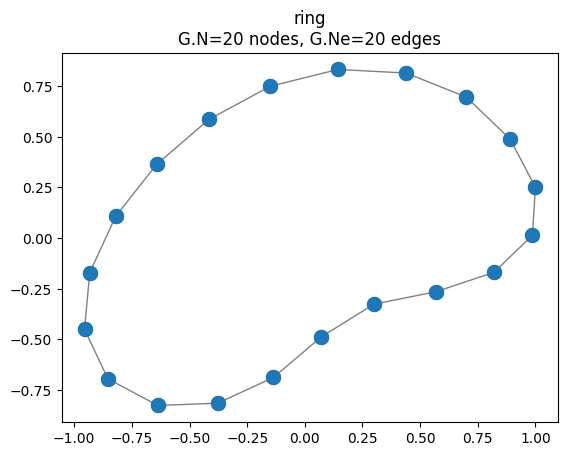

In [11]:
G = pg.graphs.Ring(20)
G.set_coordinates()
pg.plotting.plot_graph(G)
thresholds = [0,0.01,0.02,0.03,0.1,0.15,0.16,0.17]

In [16]:
L = G.L.todense()
X = lh.create_deltas(L,taus=[0.5,1,2.5,4])
res = lh.learn_heat(X,tau0=[0.5,1,2.5,4],alpha=0.01,beta=0.1,max_iter=50)
Lnew = res["L"]

In [21]:
G.set_coordinates()

In [17]:
Wnew = lh.laplacian_to_adjacency(Lnew)

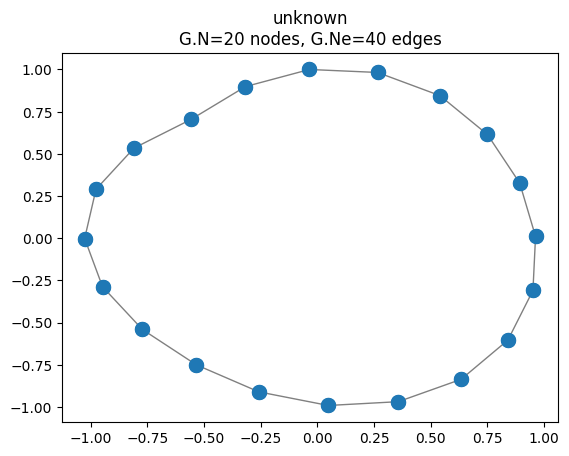

In [38]:
W = np.copy(Wnew)
W[W<thresholds[7]] = 0
Gnew = pg.graphs.Graph(W)
Gnew.set_coordinates(G.coords)
pg.plotting.plot_graph(Gnew)

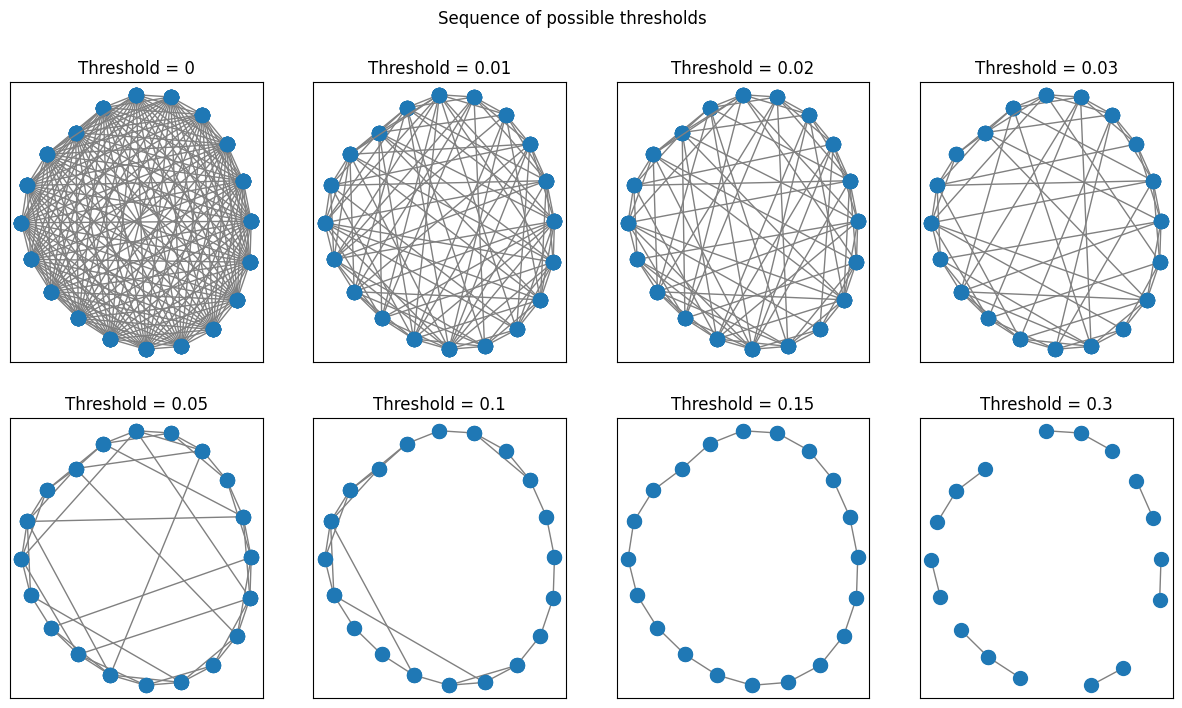

In [57]:
fig, axs = plt.subplots(2,4,figsize=(15,8))
thresholds = [0,0.01,0.02,0.03,0.05,0.1,0.15,0.3]
fig.suptitle("Sequence of possible thresholds",y=0.97)
for i,ax in enumerate(axs.reshape(-1)):
    W = np.copy(Wnew)
    W[W<thresholds[i]] = 0
    Gnew = pg.graphs.Graph(W)
    Gnew.set_coordinates(G.coords)
    pg.plotting.plot_graph(Gnew,ax=ax,plot_name=f"Threshold = {thresholds[i]}")
    ax.set_xticks([])
    ax.set_yticks([])